## NY Taxi - duration prediction

In [30]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
pd.__version__

'2.2.3'

## Read file from web directly

In [3]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-02.parquet")

In [4]:
df.shape

(46621, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46621 entries, 0 to 46620
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               46621 non-null  int32         
 1   lpep_pickup_datetime   46621 non-null  datetime64[us]
 2   lpep_dropoff_datetime  46621 non-null  datetime64[us]
 3   store_and_fwd_flag     44104 non-null  object        
 4   RatecodeID             44104 non-null  float64       
 5   PULocationID           46621 non-null  int32         
 6   DOLocationID           46621 non-null  int32         
 7   passenger_count        44104 non-null  float64       
 8   trip_distance          46621 non-null  float64       
 9   fare_amount            46621 non-null  float64       
 10  extra                  46621 non-null  float64       
 11  mta_tax                46621 non-null  float64       
 12  tip_amount             46621 non-null  float64       
 13  t

In [6]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-02-01 00:12:15,2025-02-01 00:15:48,N,1.0,166,41,1.0,0.65,6.5,...,0.5,1.80,0.0,NaN,1.0,10.80,1.0,1.0,0.00,0.00
1,2,2025-01-31 23:57:05,2025-02-01 00:24:24,N,1.0,255,161,1.0,6.57,31.7,...,0.5,0.00,0.0,NaN,1.0,37.70,2.0,1.0,2.75,0.75
2,2,2025-02-01 00:24:26,2025-02-01 00:49:54,N,1.0,75,182,2.0,8.36,36.6,...,0.5,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00,0.00
3,1,2025-02-01 00:17:15,2025-02-01 00:25:56,N,1.0,97,209,1.0,2.40,12.8,...,1.5,3.75,0.0,NaN,1.0,22.55,1.0,1.0,2.75,0.75
4,2,2025-02-01 00:17:36,2025-02-01 00:26:36,N,1.0,7,223,1.0,1.31,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0.00


In [7]:
# Filter by trip_type
df = df[df.trip_type == 2]
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
8,2,2025-02-01 00:24:21,2025-02-01 00:24:22,N,5.0,264,264,0.0,0.00,14.0,...,0.0,1.0,0.0,NaN,1.0,16.0,1.0,2.0,0.00,0.00
19,2,2025-02-01 00:22:16,2025-02-01 00:49:50,N,5.0,181,48,2.0,7.02,50.0,...,0.0,5.0,0.0,NaN,1.0,59.5,1.0,2.0,2.75,0.75
20,2,2025-02-01 01:02:17,2025-02-01 01:04:42,N,5.0,40,40,1.0,0.00,7.0,...,0.0,0.0,0.0,NaN,1.0,8.0,1.0,2.0,0.00,0.00
21,2,2025-02-01 00:19:32,2025-02-01 00:43:22,N,5.0,255,263,2.0,5.66,55.0,...,0.0,11.9,0.0,NaN,1.0,71.4,1.0,2.0,2.75,0.75
27,2,2025-02-01 00:48:21,2025-02-01 01:11:45,N,5.0,255,90,2.0,4.84,60.0,...,0.0,12.9,0.0,NaN,1.0,77.4,1.0,2.0,2.75,0.75


In [9]:
# Needed only in case pandas does not parse datetime correctly
# df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
# df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

# OR

df.loc[:, 'lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df.loc[:, 'lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

In [10]:
# Finding trip duration
df.lpep_dropoff_datetime - df.lpep_pickup_datetime

8       0 days 00:00:01
19      0 days 00:27:34
20      0 days 00:02:25
21      0 days 00:23:50
27      0 days 00:23:24
              ...      
44051   0 days 00:00:03
44065   0 days 00:00:14
44067   0 days 00:22:32
44070   0 days 00:19:20
44100   0 days 00:12:58
Length: 1683, dtype: timedelta64[us]

In [11]:
# Create duration column
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
8,2,2025-02-01 00:24:21,2025-02-01 00:24:22,N,5.0,264,264,0.0,0.00,14.0,...,1.0,0.0,NaN,1.0,16.0,1.0,2.0,0.00,0.00,0 days 00:00:01
19,2,2025-02-01 00:22:16,2025-02-01 00:49:50,N,5.0,181,48,2.0,7.02,50.0,...,5.0,0.0,NaN,1.0,59.5,1.0,2.0,2.75,0.75,0 days 00:27:34
20,2,2025-02-01 01:02:17,2025-02-01 01:04:42,N,5.0,40,40,1.0,0.00,7.0,...,0.0,0.0,NaN,1.0,8.0,1.0,2.0,0.00,0.00,0 days 00:02:25
21,2,2025-02-01 00:19:32,2025-02-01 00:43:22,N,5.0,255,263,2.0,5.66,55.0,...,11.9,0.0,NaN,1.0,71.4,1.0,2.0,2.75,0.75,0 days 00:23:50
27,2,2025-02-01 00:48:21,2025-02-01 01:11:45,N,5.0,255,90,2.0,4.84,60.0,...,12.9,0.0,NaN,1.0,77.4,1.0,2.0,2.75,0.75,0 days 00:23:24


### Convert duration to min

In [22]:
td = df.duration.iloc[150]

In [23]:
td

Timedelta('0 days 00:15:14')

In [24]:
td.total_seconds()

914.0

In [25]:
td.total_seconds() / 60

15.233333333333333

In [26]:
# Convert duration coulmn in df to minutes
df.duration = df.duration.apply(lambda td:td.total_seconds() / 60)

In [27]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
8,2,2025-02-01 00:24:21,2025-02-01 00:24:22,N,5.0,264,264,0.0,0.00,14.0,...,1.0,0.0,NaN,1.0,16.0,1.0,2.0,0.00,0.00,0.016667
19,2,2025-02-01 00:22:16,2025-02-01 00:49:50,N,5.0,181,48,2.0,7.02,50.0,...,5.0,0.0,NaN,1.0,59.5,1.0,2.0,2.75,0.75,27.566667
20,2,2025-02-01 01:02:17,2025-02-01 01:04:42,N,5.0,40,40,1.0,0.00,7.0,...,0.0,0.0,NaN,1.0,8.0,1.0,2.0,0.00,0.00,2.416667
21,2,2025-02-01 00:19:32,2025-02-01 00:43:22,N,5.0,255,263,2.0,5.66,55.0,...,11.9,0.0,NaN,1.0,71.4,1.0,2.0,2.75,0.75,23.833333
27,2,2025-02-01 00:48:21,2025-02-01 01:11:45,N,5.0,255,90,2.0,4.84,60.0,...,12.9,0.0,NaN,1.0,77.4,1.0,2.0,2.75,0.75,23.400000


In [29]:
df.shape

(1683, 22)

/tmp/ipykernel_11337/533639664.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

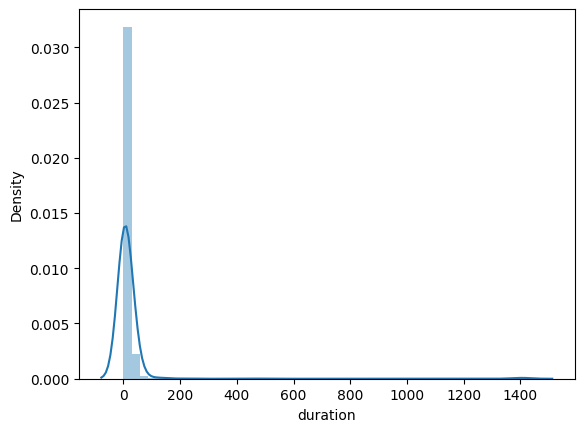

In [33]:
# Visualize distribution of duration
sns.distplot(df.duration)

In [34]:
df.duration.describe()

count    1683.000000
mean       19.211398
std       114.733352
min         0.000000
25%         0.083333
50%         1.833333
75%        14.216667
max      1434.583333
Name: duration, dtype: float64

In [35]:
# look at percentile
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1683.000000
mean       19.211398
std       114.733352
min         0.000000
50%         1.833333
95%        38.346667
98%        60.922667
99%       146.624333
max      1434.583333
Name: duration, dtype: float64

### Most trips are around or less than 1 hour

In [36]:
# Filter for 1 min to 60 min duration
(df.duration >= 1) & (df.duration <= 60)

8        False
19        True
20        True
21        True
27        True
         ...  
44051    False
44065    False
44067     True
44070     True
44100     True
Name: duration, Length: 1683, dtype: bool

In [37]:
((df.duration >= 1) & (df.duration <= 60)).mean()

np.float64(0.5210932857991681)

In [38]:
df = df[(df.duration >= 1) & (df.duration <= 60)]
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
19,2,2025-02-01 00:22:16,2025-02-01 00:49:50,N,5.0,181,48,2.0,7.02,50.0,...,5.00,0.0,NaN,1.0,59.5,1.0,2.0,2.75,0.75,27.566667
20,2,2025-02-01 01:02:17,2025-02-01 01:04:42,N,5.0,40,40,1.0,0.00,7.0,...,0.00,0.0,NaN,1.0,8.0,1.0,2.0,0.00,0.00,2.416667
21,2,2025-02-01 00:19:32,2025-02-01 00:43:22,N,5.0,255,263,2.0,5.66,55.0,...,11.90,0.0,NaN,1.0,71.4,1.0,2.0,2.75,0.75,23.833333
27,2,2025-02-01 00:48:21,2025-02-01 01:11:45,N,5.0,255,90,2.0,4.84,60.0,...,12.90,0.0,NaN,1.0,77.4,1.0,2.0,2.75,0.75,23.400000
55,1,2025-02-01 02:46:39,2025-02-01 03:02:29,N,5.0,80,79,2.0,5.20,55.0,...,11.15,0.0,NaN,0.0,66.9,1.0,2.0,0.00,0.75,15.833333


In [39]:
df.shape

(877, 22)

In [40]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
19,2,2025-02-01 00:22:16,2025-02-01 00:49:50,N,5.0,181,48,2.0,7.02,50.0,...,5.00,0.0,NaN,1.0,59.50,1.0,2.0,2.75,0.75,27.566667
20,2,2025-02-01 01:02:17,2025-02-01 01:04:42,N,5.0,40,40,1.0,0.00,7.0,...,0.00,0.0,NaN,1.0,8.00,1.0,2.0,0.00,0.00,2.416667
21,2,2025-02-01 00:19:32,2025-02-01 00:43:22,N,5.0,255,263,2.0,5.66,55.0,...,11.90,0.0,NaN,1.0,71.40,1.0,2.0,2.75,0.75,23.833333
27,2,2025-02-01 00:48:21,2025-02-01 01:11:45,N,5.0,255,90,2.0,4.84,60.0,...,12.90,0.0,NaN,1.0,77.40,1.0,2.0,2.75,0.75,23.400000
55,1,2025-02-01 02:46:39,2025-02-01 03:02:29,N,5.0,80,79,2.0,5.20,55.0,...,11.15,0.0,NaN,0.0,66.90,1.0,2.0,0.00,0.75,15.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44002,2,2025-02-28 22:09:36,2025-02-28 22:37:30,N,5.0,181,164,1.0,8.10,75.0,...,15.90,0.0,NaN,1.0,95.40,1.0,2.0,2.75,0.75,27.900000
44017,2,2025-02-28 22:56:37,2025-02-28 23:07:57,N,5.0,66,209,1.0,2.16,34.0,...,7.70,0.0,NaN,1.0,46.20,1.0,2.0,2.75,0.75,11.333333
44067,2,2025-02-28 23:02:02,2025-02-28 23:24:34,N,5.0,66,48,2.0,6.06,43.0,...,9.50,0.0,NaN,1.0,57.00,1.0,2.0,2.75,0.75,22.533333
44070,2,2025-02-28 23:17:52,2025-02-28 23:37:12,N,5.0,33,150,1.0,13.66,70.0,...,5.25,0.0,NaN,1.0,76.25,1.0,2.0,0.00,0.00,19.333333


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 19 to 44100
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               877 non-null    int32         
 1   lpep_pickup_datetime   877 non-null    datetime64[us]
 2   lpep_dropoff_datetime  877 non-null    datetime64[us]
 3   store_and_fwd_flag     877 non-null    object        
 4   RatecodeID             877 non-null    float64       
 5   PULocationID           877 non-null    int32         
 6   DOLocationID           877 non-null    int32         
 7   passenger_count        877 non-null    float64       
 8   trip_distance          877 non-null    float64       
 9   fare_amount            877 non-null    float64       
 10  extra                  877 non-null    float64       
 11  mta_tax                877 non-null    float64       
 12  tip_amount             877 non-null    float64       
 13  tolls_a